In [88]:
from ucimlrepo import fetch_ucirepo 
from implementations.id3 import DecisionTreeClassifier
from implementations.bayes import NaiveBayes
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from typing import Tuple
import pandas as pd

In [95]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = np.array(wine_quality.data.features)
y = np.array(wine_quality.data.targets.quality) 

In [100]:
def reassign_classes(y: np.ndarray) -> np.ndarray:
    new_y = []
    for current_class in y:
        if current_class > 5:
            new_y.append(1)
        else:
            new_y.append(0)
    return new_y

In [101]:
new_y = reassign_classes(y)

In [102]:
c = Counter()
c.update(new_y)

In [103]:
c.most_common(1)[0][0]

1

<BarContainer object of 2 artists>

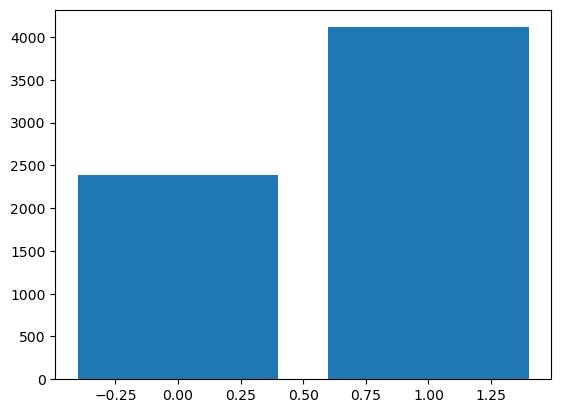

In [104]:
plt.bar([x for x in range(2)], c.values())

In [42]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, new_y, test_size=0.1, random_state=123)

In [49]:
dc = DecisionTreeClassifier(10)
dc.fit(x_train, y_train)

samples = len(y_test)
correctly_predicted = 0
for sample, gt in zip(x_test, y_test):
    prediction = dc.predict(sample)
    print(int(prediction), gt)
    if prediction == gt:
        correctly_predicted += 1

print(f"Accuracy: {(correctly_predicted/samples)*100:.2f}%")

1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
0 1
0 1
1 1
0 0
0 1
1 1
1 0
1 1
0 0
0 0
1 1
0 0
1 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 1
0 0
1 1
1 1
1 1
1 1
0 1
1 0
1 1
0 0
1 1
1 1
0 0
0 1
1 1
1 1
1 1
0 0
0 1
0 0
1 1
0 0
1 1
1 0
1 0
0 0
1 0
0 1
1 1
1 1
1 1
1 0
1 1
0 1
1 1
1 1
1 1
0 0
1 0
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
0 1
0 1
0 1
0 0
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 0
0 1
1 1
1 1
0 1
1 1
0 0
0 0
1 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 0
0 0
0 0
1 1
1 1
0 0
1 1
1 0
1 1
0 1
0 1
1 1
1 1
1 1
0 0
0 1
0 0
0 0
0 0
0 1
0 0
1 0
1 1
0 0
1 1
1 1
1 1
0 0
1 0
1 1
1 0
1 1
0 0
1 1
1 1
1 1
0 0
0 1
1 1
1 1
0 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 1
0 0
0 0
0 0
0 0
1 1
1 0
1 1
0 0
1 1
0 1
1 0
1 1
1 0
0 0
1 1
0 1
1 1
1 1
1 1
0 0
0 1
0 0
1 0
0 1
1 1
1 1
0 0
1 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 0
1 1
0 0
1 1
1 1
1 1
1 0
1 0
1 1
1 1
1 1
0 0
1 0
1 1
0 0
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 0
1 1
0 0
1 1
1 1
0 0
1 0


Predicting  1/650	Prediction: 1	Actual class: 1
Predicting  2/650	Prediction: 1	Actual class: 0
Predicting  3/650	Prediction: 1	Actual class: 1
Predicting  4/650	Prediction: 1	Actual class: 1
Predicting  5/650	Prediction: 1	Actual class: 1
Predicting  6/650	Prediction: 1	Actual class: 1
Predicting  7/650	Prediction: 1	Actual class: 1
Predicting  8/650	Prediction: 1	Actual class: 1
Predicting  9/650	Prediction: 1	Actual class: 0
Predicting 10/650	Prediction: 1	Actual class: 1
Predicting 11/650	Prediction: 1	Actual class: 1
Predicting 12/650	Prediction: 1	Actual class: 1
Predicting 13/650	Prediction: 1	Actual class: 1
Predicting 14/650	Prediction: 1	Actual class: 0
Predicting 15/650	Prediction: 1	Actual class: 1
Predicting 16/650	Prediction: 1	Actual class: 1
Predicting 17/650	Prediction: 1	Actual class: 0
Predicting 18/650	Prediction: 1	Actual class: 1
Predicting 19/650	Prediction: 1	Actual class: 0
Predicting 20/650	Prediction: 1	Actual class: 0
Predicting 21/650	Prediction: 1	Actual c

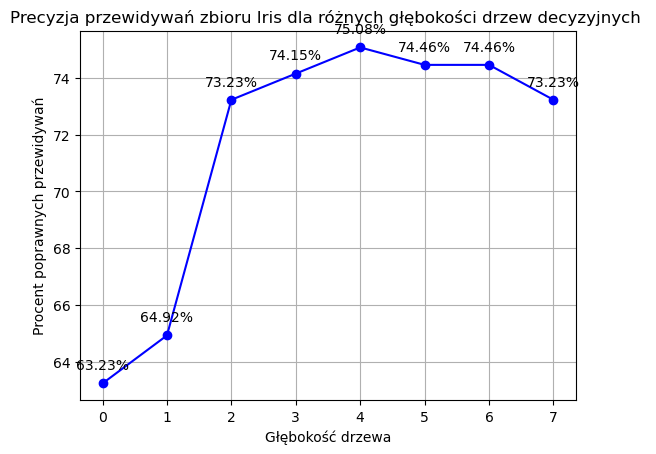

In [50]:
accuracies = []
depths = []
x_train, x_test, y_train, y_test = train_test_split(X, new_y, test_size=0.1, random_state=123)

for depth in range(8):
    dc = DecisionTreeClassifier(depth)
    dc.fit(x_train, y_train)
    accuracies.append(dc.evaluate(x_test, y_test, verbose=1)*100)
    depths.append(depth)
    
plt.plot(depths,accuracies,'bo-')
for x,y in zip(depths,accuracies):
    label = f"{y:.2f}%"
    plt.annotate(label, (x,y), textcoords="offset points",  xytext=(0,10),  ha='center') 
    
plt.grid()
plt.title("Precyzja przewidywań zbioru Iris dla różnych głębokości drzew decyzyjnych ")
plt.ylabel("Procent poprawnych przewidywań")
plt.xlabel("Głębokość drzewa")
plt.show()

In [69]:
class RandomForestClassifier:
    def __init__(self, classifiers_number: int, max_depth: int):
        self._classifiers_number = classifiers_number
        self._max_depth = max_depth
        
        self._models = []
        
    @staticmethod
    def bootstrap(x: np.ndarray, y: np.ndarray) -> Tuple[np.array, np.array]:
        assert len(x) == len(y)
        N = len(x)
        new_x = []
        new_y = []
        
        for _ in range(N):
            i = np.random.randint(N)
            new_x.append(x[i])
            new_y.append(y[i])
        
        return (np.array(new_x), np.array(new_y))
    
    def train_random_forest(self, x: np.ndarray, y: np.ndarray, tree_percentage=1.0):
        trees_number = int(tree_percentage * self._classifiers_number)
        
        for _ in range(trees_number):
            dc = DecisionTreeClassifier(self._max_depth)
            
            x_i, y_i = self.bootstrap(x, y)
            dc.fit(x_i, y_i)
            self._models.append(dc)
            
        for _ in range(self._classifiers_number - trees_number):
            bc = NaiveBayes()
            x_i, y_i = self.bootstrap(x, y)
            
            bc.build_classifier(x_i, y_i, discrete_x=True)
            self._models.append(bc)
            
            
            
    def predict(self, data: np.ndarray) -> int:
        if self._models is not None:
            predictions = [model.predict(data) for model in self._models]
            c = Counter(predictions)
            return c.most_common(1)[0][0]

    def evaluate(self, data: np.ndarray, classes: np.ndarray, verbose=0) -> float:
        if self._models is not None:
            samples = len(classes)
            positively_predicted = 0
            for i, subdataset in enumerate(zip(data, classes), 1):
                sample, actual_class = subdataset
                predicted_class = self.predict(sample)
                if predicted_class == actual_class:
                    positively_predicted += 1
                if verbose == 1:
                    print(f"Predicting {i:>2}/{samples}\tPrediction: {predicted_class}\tActual class: {actual_class}")
            accuracy = positively_predicted / samples
            if verbose == 1:
                print()
            print(f"Accuracy after predicting {samples} samples: {accuracy * 100:.2f}%")
            return accuracy
        

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, new_y, test_size=0.1, random_state=123)
rfc = RandomForestClassifier(10, 10)
rfc.train_random_forest(x_train, y_train, tree_percentage=1.0)

samples = len(y_test)
correctly_predicted = 0
for sample, gt in zip(x_test, y_test):
    prediction = rfc.predict(sample)
    print(int(prediction), gt)
    if prediction == gt:
        correctly_predicted += 1

print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")


1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
0 1
0 1
1 1
0 0
1 1
1 1
1 0
1 1
1 0
0 0
1 1
0 0
1 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 1
0 0
1 1
1 0
1 0
0 0
0 0
1 1
1 1
1 1
1 1
1 0
1 1
0 1
1 1
1 1
1 1
0 0
0 0
0 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
0 1
0 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
1 0
0 0
0 0
0 1
1 0
1 0
1 1
0 0
1 1
1 1
1 1
0 0
1 0
1 1
1 0
1 1
0 0
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 1
0 0
0 0
0 0
1 0
1 1
1 0
1 1
0 0
1 1
0 1
1 0
1 1
0 0
0 0
1 1
0 1
1 1
1 1
1 1
1 0
0 1
0 0
1 0
1 1
1 1
0 1
1 0
1 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
1 1
1 0
1 1
1 1
1 1
0 0
1 0
1 1
1 1
1 1
0 0
1 0
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 0
1 0


In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, new_y, test_size=0.1, random_state=123)
rfc = RandomForestClassifier(10, 10)
rfc.train_random_forest(x_train, y_train, tree_percentage=0.0)

samples = len(y_test)
correctly_predicted = 0
for sample, gt in zip(x_test, y_test):
    prediction = rfc.predict(sample)
    print(int(prediction), gt)
    if prediction == gt:
        correctly_predicted += 1

print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")


1 1
1 0
0 1
0 1
0 1
1 1
1 1
1 1
0 0
0 1
0 1
0 1
1 1
0 0
0 1
1 1
0 0
0 1
0 0
0 0
1 1
0 0
1 0
1 1
1 1
1 1
1 1
0 0
0 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
0 1
1 1
0 1
1 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 1
0 0
1 1
0 0
0 1
0 0
1 1
1 0
0 0
0 0
0 0
0 1
1 1
1 1
1 1
0 0
1 1
1 1
0 1
0 1
1 1
0 0
0 0
0 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
0 1
1 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 0
0 1
0 1
1 1
0 1
0 1
0 0
0 0
1 0
0 0
1 1
0 0
0 0
0 1
0 0
0 0
0 1
1 1
1 1
0 1
0 1
1 1
1 1
0 1
1 1
0 0
0 0
0 0
0 0
1 0
1 1
0 1
1 0
1 1
1 0
1 1
0 1
1 1
1 1
1 1
1 1
0 0
0 1
0 0
0 0
1 0
0 1
0 0
0 0
0 1
0 0
1 1
1 1
1 1
0 0
1 0
1 1
1 0
1 1
0 0
0 1
0 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 1
0 0
1 0
1 0
1 0
1 1
0 0
0 1
0 0
1 1
0 1
1 0
0 1
1 0
0 0
0 1
1 1
0 1
1 1
1 1
0 0
0 1
0 0
1 0
1 1
0 1
0 1
0 0
0 0
1 1
0 0
1 1
0 1
0 1
0 0
1 1
1 1
1 1
0 1
1 1
0 1
1 1
1 0
0 1
1 1
1 1
1 1
0 1
1 1
0 0
0 0
1 1
0 0
0 1
1 0
1 1
0 1
0 1
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 1
1 1
0 1
0 1
0 0
1 1
1 1
0 1
1 0
1 1
0 0
1 1
1 1
0 0
0 0


In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, new_y, test_size=0.1, random_state=123)
nb = NaiveBayes()
nb.build_classifier(x_train, y_train, discrete_x=True)

samples = len(y_test)
correctly_predicted = 0
for sample, gt in zip(x_test, y_test):
    prediction = nb.predict(sample)
    print(int(prediction), gt)
    if prediction == gt:
        correctly_predicted += 1

print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")


1 1
1 0
1 1
0 1
1 1
1 1
1 1
1 1
0 0
0 1
0 1
0 1
1 1
0 0
0 1
0 1
0 0
0 1
0 0
0 0
1 1
0 0
1 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
0 1
1 1
0 1
1 0
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 1
0 0
1 1
0 0
0 1
0 0
1 1
0 0
0 0
0 0
0 0
0 1
1 1
1 1
1 1
0 0
1 1
1 1
0 1
0 1
1 1
0 0
0 0
0 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
0 1
1 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
1 0
0 1
0 1
1 1
0 1
0 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 1
0 0
0 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
0 0
0 0
0 0
0 0
1 0
1 1
0 1
1 0
1 1
1 0
1 1
0 1
1 1
1 1
1 1
1 1
1 0
0 1
0 0
0 0
1 0
0 1
0 0
0 0
0 1
0 0
1 1
1 1
1 1
0 0
1 0
1 1
1 0
1 1
0 0
0 1
0 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 1
1 0
1 0
1 0
1 0
1 1
0 0
0 1
0 0
1 1
0 1
1 0
0 1
1 0
0 0
0 1
1 1
0 1
1 1
1 1
0 0
0 1
0 0
1 0
1 1
0 1
0 1
0 0
0 0
1 1
0 0
1 1
0 1
0 1
0 0
1 1
1 1
1 1
0 1
1 1
0 1
1 1
1 0
0 1
1 1
1 1
1 1
0 1
1 1
0 0
0 0
1 1
0 0
0 1
1 0
1 1
0 1
0 1
0 0
0 0
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 1
1 1
0 1
0 1
0 0
1 1
1 1
0 1
1 0
1 1
0 0
1 1
1 1
0 0
1 0


In [89]:
data = pd.read_csv("healthcare_dataset.csv")

In [92]:
data = np.loadtxt("healthcare_dataset.csv", skiprows=0)

ValueError: could not convert string 'Name,Age,Gender,Blood' to float64 at row 0, column 1.

In [105]:
from sklearn.naive_bayes import CategoricalNB

In [106]:
c = CategoricalNB()

In [113]:
c.fit(x_train, y_train)

samples = len(y_test)
predictions = c.predict(x_test)

correctly_predicted = 0
for prediction, gt in zip(predictions, y_test):
    print(int(prediction), gt)
    if prediction == gt:
        correctly_predicted += 1

print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")

1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
1 1
0 1
1 1
0 0
0 1
1 1
0 0
1 1
0 0
0 0
1 1
0 0
1 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 0
1 1
0 0
1 1
1 1
1 0
1 1
1 1
1 1
0 1
1 0
1 1
0 0
0 1
1 0
1 1
0 0
0 0
0 0
0 0
1 1
0 1
1 1
1 1
1 0
1 1
0 1
1 1
0 1
1 1
0 0
0 0
0 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
1 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
1 1
0 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
0 0
1 0
1 0
1 0
1 0
1 1
1 1
1 0
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
1 0
1 0
0 0
0 1
0 0
1 0
1 1
0 0
1 1
1 1
1 1
0 0
1 0
1 1
1 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
1 1
0 0
1 1
1 0
1 0
1 0
0 0
1 1
1 0
0 1
0 0
1 1
1 1
1 0
1 1
1 0
0 0
1 1
0 1
1 1
1 1
1 1
1 0
1 1
0 0
1 0
1 1
1 1
0 1
1 0
1 0
1 1
1 0
1 1
0 1
1 1
0 0
0 1
1 1
1 1
0 1
1 1
0 1
1 1
1 0
0 1
1 1
1 1
0 1
1 1
0 1
0 0
0 0
1 1
0 0
1 1
0 0
1 1
0 1
1 1
0 0
0 0
1 1
1 1
1 1
1 0
1 0
0 1
0 0
1 1
1 1
1 1
0 1
0 0
1 1
1 1
1 1
1 0
1 1
0 0
1 1
1 1
0 0
1 0


# Healthcare dataset

Name: This column represents the name of the patient associated with the healthcare record.

Age: The age of the patient at the time of admission, expressed in years.

Gender: Indicates the gender of the patient, either "Male" or "Female."

Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).

Medical Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.

Date of Admission: The date on which the patient was admitted to the healthcare facility.

Doctor: The name of the doctor responsible for the patient's care during their admission.

Hospital: Identifies the healthcare facility or hospital where the patient was admitted.

Insurance Provider: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."

Billing Amount: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.

Room Number: The room number where the patient was accommodated during their admission.

Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.

Discharge Date: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.

Medication: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."

Test Results: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.

## Used / modified features
- age
- gender
- blood type
- medical condition
- doctor
- 


In [114]:
data = pd.read_csv("../data/healthcare_dataset.csv")

In [115]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


(array([  3.,  14.,  38.,  95., 145., 286., 418., 535., 614., 655., 617.,
        665., 600., 633., 640., 632., 623., 571., 617., 631., 644., 620.,
        611., 660., 566., 618., 548., 690., 602., 652., 567., 596., 607.,
        625., 637., 588., 603., 619., 632., 595., 635., 641., 591., 649.,
        643., 660., 558., 655., 621., 615., 601., 604., 580., 631., 622.,
        647., 623., 659., 621., 616., 605., 633., 602., 630., 604., 615.,
        606., 629., 613., 688., 585., 613., 600., 596., 640., 609., 595.,
        622., 630., 615., 604., 584., 633., 643., 644., 653., 617., 673.,
        564., 596., 633., 591., 598., 516., 392., 242., 132.,  50.,  17.,
          4.]),
 array([-2008.49213986, -1460.7644511 ,  -913.03676233,  -365.30907357,
          182.41861519,   730.14630396,  1277.87399272,  1825.60168148,
         2373.32937025,  2921.05705901,  3468.78474777,  4016.51243654,
         4564.2401253 ,  5111.96781406,  5659.69550283,  6207.42319159,
         6755.15088035,  7302.

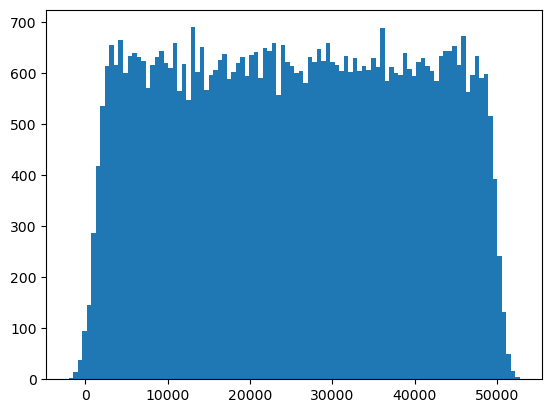

In [135]:
plt.hist(data["Billing Amount"], bins=100)

In [136]:
amount_spend = data["Billing Amount"]

In [149]:
Counter(data["Blood Type"])

Counter({'A-': 6969,
         'A+': 6956,
         'AB+': 6947,
         'AB-': 6945,
         'B+': 6945,
         'B-': 6944,
         'O+': 6917,
         'O-': 6877})

In [148]:
values = []
for amount in amount_spend[:1000]:
    if(amount // 1e4 == -1):
        print(amount, amount // 1e4)
    
    values.append(amount // 1e4)

-502.5078127009479 -1.0
-1018.245371228288 -1.0


In [147]:
Counter(values)

Counter({4.0: 201, 2.0: 200, 1.0: 197, 3.0: 196, 0.0: 196, 5.0: 8, -1.0: 2})

In [140]:
24830.16460954 // 1e4

2.0

In [162]:
age_split = []
for age in data["Age"][:1000]:

    
    age_split.append(age // 5)

In [163]:
c = Counter(age_split)

<BarContainer object of 15 artists>

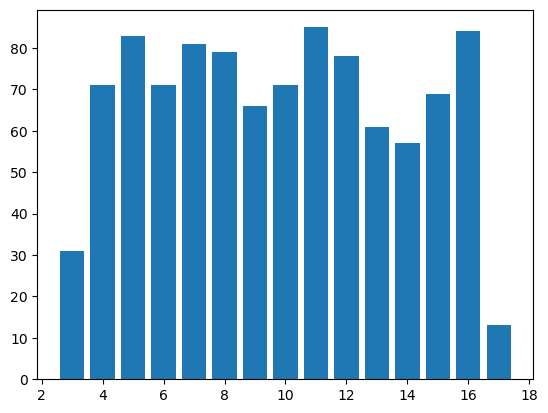

In [164]:
plt.bar(c.keys(), c.values())

Jak zastosować kodowanie z gorącą jedynką (ang. one hot) w drzewie decyzyjnym?

Z tego co na razie zrozumiałem, należy po prostu zwiększyć liczbę kolumn i kodowac na zasadzie 1 vs reszta. Przykładowo dla 3 kolorów [czerwony, zielony, niebieski] kodować kolumnami: one_hot_red, one_hot_green, one_hot_blue